<a href="https://colab.research.google.com/github/carvalheiracarlos/scikit-maad-Rois/blob/main/scikit_maad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NoteBook to test basic functions of Scikit Maad package.

[Github | Release 1.3](https://github.com/scikit-maad/scikit-maad/releases/tag/1.3)

[Github | production | Readme.md](https://github.com/scikit-maad/scikit-maad)


In [1]:
!pip install scikit-maad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import glob
from maad import sound, rois
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [3]:
param_file = 'PMpiloto_2018_20181121_220136-222414_assoviosEfim.txt'
param_dataset = pd.read_csv(param_file, sep="\t")

In [4]:
param_dataset

,Selection,View,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Begin File,OBS
0,1,Spectrogram 1,3,0.900423,2.115111,9527.3,52800.0,PMpiloto_2018_20181121_220136_337.wav,click incerto
1,2,Spectrogram 1,3,6.597455,7.024715,4696.1,7353.3,PMpiloto_2018_20181121_220136_337.wav,NaN
2,3,Spectrogram 1,1,6.844630,7.049432,4267.5,7010.4,PMpiloto_2018_20181121_220136_337.wav,NaN
3,4,Spectrogram 1,3,10.896184,11.351692,5485.7,50742.9,PMpiloto_2018_20181121_220136_337.wav,click incerto
4,5,Spectrogram 1,3,12.121466,12.979516,4781.8,7867.5,PMpiloto_2018_20181121_220151_226.wav,NaN
...,...,...,...,...,...,...,...,...,...
95,96,Spectrogram 1,3,154.408897,154.666665,7010.4,8467.5,PMpiloto_2018_20181121_220502_140.wav,NaN
96,97,Spectrogram 1,1,155.245760,155.648302,6239.0,8296.1,PMpiloto_2018_20181121_220502_140.wav,NaN
97,98,Spectrogram 1,3,156.757058,157.011295,3753.3,7781.8,PMpiloto_2018_20181121_220502_140.wav,NaN
98,99,Spectrogram 1,3,157.279657,157.696323,6924.7,8810.4,PMpiloto_2018_20181121_220502_140.wav,NaN


In [5]:
def list_wav_files(relative_path: str, file_extension: str):
  path = relative_path + file_extension
  return glob.glob(path)

In [6]:
files = list_wav_files('./*', '.wav')
print(files)

['./PMpiloto_2018_20181121_220136_337.wav']


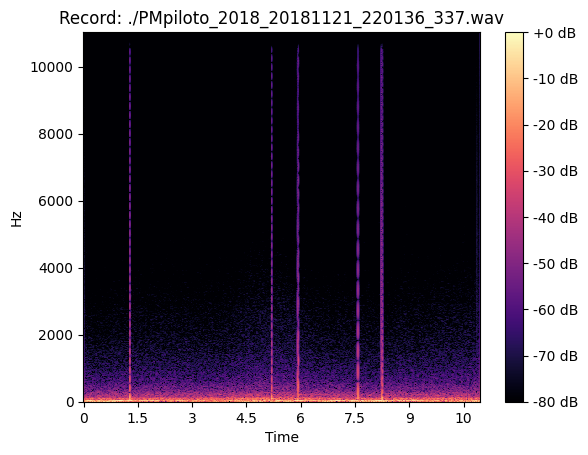

In [7]:
for wav_file in files:
  fig, ax = plt.subplots()
  y, sr = librosa.load(wav_file)
  D = librosa.stft(y)  # STFT of y
  S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
  img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
  ax.set(title=f'Record: {wav_file}')
  fig.colorbar(img, ax=ax, format="%+2.f dB")

In [8]:
for record in files: 
  record_stats = param_dataset.loc[param_dataset['Begin File'] == record[2:]]
  for index, row in record_stats.iterrows():
    s, fs = sound.load(record)
    rois.find_rois_cwt(s, fs, 
                        flims=(record_stats.iloc[index]['Low Freq (Hz)'],
                              record_stats.iloc[index]['High Freq (Hz)']), 
                        tlen=record_stats.iloc[index]['End Time (s)'] - record_stats.iloc[0]['Begin Time (s)'], 
                        th=0,
                        display=False
                       )

/usr/local/lib/python3.9/dist-packages/maad/sound/input_output.py:113: WavFileWarning: Reached EOF prematurely; finished at 25215020 bytes, expected 25215024 bytes from header.
  fs, s = wavfile.read(filename)
/usr/local/lib/python3.9/dist-packages/maad/sound/input_output.py:113: WavFileWarning: Reached EOF prematurely; finished at 25215020 bytes, expected 25215024 bytes from header.
  fs, s = wavfile.read(filename)


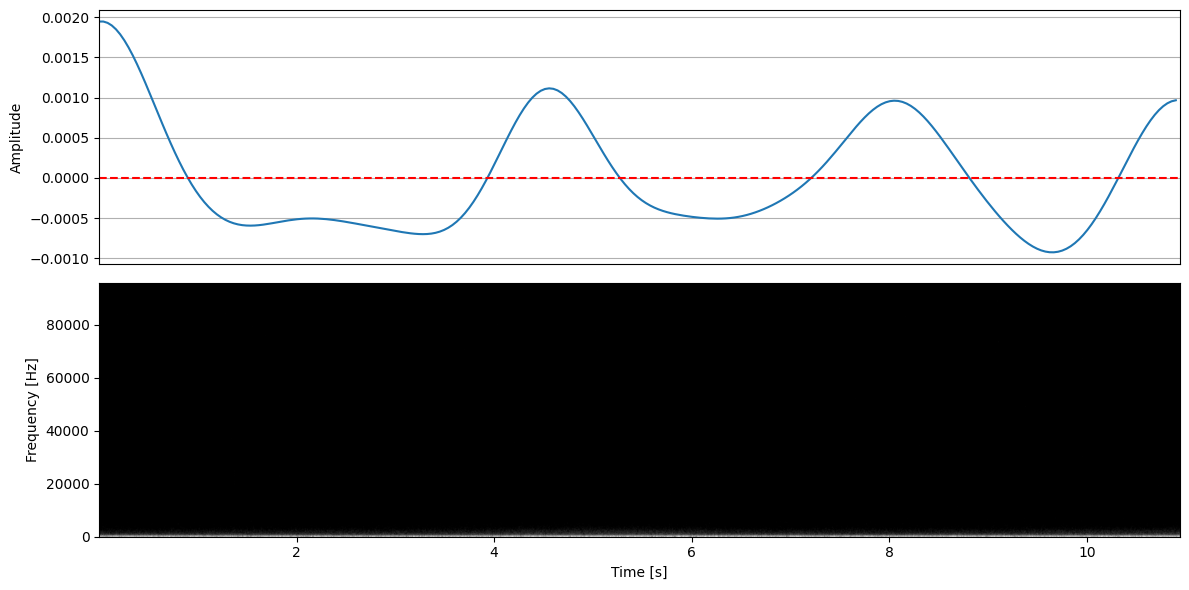

In [9]:
for record in files: 
  s, fs = sound.load(record)
  rois.find_rois_cwt(s, fs, 
                      flims=(9527.3, 52800.0), 
                      tlen=2.115111 - 0.900423, 
                      display=True,
                      save_df=True
                    )